# Project 0 - Introduction to Artificial Intelligence
## Nazanin Yousefian 
### 810197610



## Abstract
### In this project, our aim is to fill an incomplete file based on statical analysis. We analyse different attributes and try to find the best solution to predict which value the goal column should take.

## Introduction
### In a .csv file we have collected data of 1000 users. we want to identify wheter a user clicked on advertisement or not. Based on information we have about their daily internet usage, age, daily time spent on site and etc we want to predict if this user clicked on advertisement or not as some datas are missing. This prediction is based on analysis of similar users to this specific user.


### Project Description
First of all we import libraries which we use in this project. We use *pandas* to handle our dataframe, *time* to calculate the time it takes to run our program, *scipy.stats* to create diagram of normal distribution and *matplotlib* to show plots. 
*advertison_dataset* is a csv file which includes record of 1000 users. We read this file and save its information in a dataframe.

In [1]:
import pandas as pd
import time
import scipy.stats as ss
import matplotlib.pyplot as plt
file_name = 'advertising_dataset.csv'
data = pd.read_csv(file_name)




*dataframe.head()* is a function to show 5 first rows of our file. *dataframe.tail()* is another function and it shows 5 last rows of our dataframe. 

In [2]:
data.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27 00:53:11,0.0
1,1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04 01:39:02,0.0
2,2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13 20:35:42,0.0
3,3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10 02:31:19,0.0
4,4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:18,0.0


In [3]:
data.tail()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
995,995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,Male,Lebanon,2016-02-11 21:49:00,1.0
996,996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Male,Bosnia and Herzegovina,2016-04-22 02:07:01,1.0
997,997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,Male,Mongolia,2016-02-01 17:24:57,1.0
998,998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Female,Guatemala,2016-03-24 02:35:54,0.0
999,999,NaN,26.0,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,Female,Brazil,2016-06-03 21:43:21,1.0


By using *dataframe.describe()* function we can get useful information of our dataframe. It provides summary of statistics of dataframe. count is the number of items which exist in that column. So, we can understand how many cells are empty. The next rows are mean or average, standard deviation, minimum value, 25th percentiles, 50th percentiles, 75th percentiles and maximum value.

In [4]:
data.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,1000.000000,907.000000,979.000000,1000.000000,913.000000,832.000000
mean,499.500000,64.794818,36.009193,55000.000080,179.751271,0.496394
std,288.819436,15.954841,8.783636,13414.634022,43.957934,0.500288
min,0.000000,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,249.750000,50.615000,29.000000,47031.802500,138.550000,0.000000
50%,499.500000,67.940000,35.000000,57012.300000,183.480000,0.000000
75%,749.250000,78.555000,42.000000,65470.635000,217.850000,1.000000
max,999.000000,91.430000,61.000000,79484.800000,269.960000,1.000000


We can obtain data type of our datas with the function below. Some of them are numeric and others are categoric. To process non-numeric datas we can use label encoding. We apply it on *Gender* column. If the value of cell is *Male* we replace it with *1* and if it equals to *Female*, it get replaced with *0*.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  907 non-null    float64
 2   Age                       979 non-null    float64
 3   Area Income               1000 non-null   float64
 4   Daily Internet Usage      913 non-null    float64
 5   Ad Topic Line             1000 non-null   object 
 6   City                      1000 non-null   object 
 7   Gender                    1000 non-null   object 
 8   Country                   1000 non-null   object 
 9   Timestamp                 1000 non-null   object 
 10  Clicked on Ad             832 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [6]:
data.replace(to_replace = 'Male', value = 1, inplace = True)
data.replace(to_replace = 'Female', value = 0, inplace = True)


While collecting data, it may happen that some cells do not have value and they are empty. We need to identify them and find a solution to handle them. First, we calculate how many *NaN values* (which are missing data) are in each column. 
Then, we replace them with mean of the column. So, the mean value of column does not change after this operation but its standard deviation decreases. 
Another way to handle missing data is to omit rows which have at least one empty cell(except *Clicked on Ad* column which is our goal). This may result in loss of information more than expected and our dataframe will no longer be useful.

In [7]:
data.isnull().sum()

Unnamed: 0                    0
Daily Time Spent on Site     93
Age                          21
Area Income                   0
Daily Internet Usage         87
Ad Topic Line                 0
City                          0
Gender                        0
Country                       0
Timestamp                     0
Clicked on Ad               168
dtype: int64

In [8]:
new_data = data.loc[:, data.columns != 'Clicked on Ad'].fillna(data.mean())
new_data = new_data.join(data['Clicked on Ad'])
new_data



,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,68.950000,35.0,61833.90,256.090000,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,1,80.230000,31.0,68441.85,179.751271,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,2,69.470000,26.0,59785.94,236.500000,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,3,74.150000,29.0,54806.18,245.890000,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,4,68.370000,35.0,73889.99,225.580000,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.970000,30.0,71384.57,208.580000,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1.0
996,996,51.300000,45.0,67782.17,134.420000,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1.0
997,997,51.630000,51.0,42415.72,120.370000,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1.0
998,998,55.550000,19.0,41920.79,187.950000,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0.0


Below number of Female users and Male users are shown. In addition, number of users who clicked on advertisement and who did not click are shown.

In [9]:
print('number of women : ', len(new_data[new_data['Gender'] == 0]))
print('number of men : ', len(new_data[new_data['Gender'] == 1]))
print('Clicked : ', len(new_data[new_data['Clicked on Ad'] == 1]))
print('Not Clicked : ', len(new_data[new_data['Clicked on Ad'] == 0]))

number of women :  519
number of men :  481
Clicked :  413
Not Clicked :  419


The output of next code is number of women who are older than 20;

In [10]:
print(len(new_data[(new_data['Gender'] == 0 ) & (new_data['Age'] > 20)]))

516


In this part, we want to calculate average age of users who clicked and who did not click on advertisement. we can use two methods to achieve this goal. First, we can use vectorization. The other way is to iterate over all rows to calculate sum of ages and number of users. 
When we are facing enormous data, vectorization is a more efficient way to solve problems. As shown below, the result of vectorization is provided after 8 ms but the result of iterating over all items is prepared after 281 ms which is nearly 35 times slower. 

In [11]:
tic = time.time()
age_mean = new_data.groupby('Clicked on Ad')['Age'].mean()
toc = time.time()
print(age_mean)
print('time: ', (toc - tic) * 1000)


Clicked on Ad
0.0    31.723326
1.0    40.295600
Name: Age, dtype: float64
time:  4.439115524291992


In [12]:
clk = 0
num1 = 0
not_clk = 0
num2 = 0
tic = time.time()
for index, person in new_data.iterrows():
    if person['Clicked on Ad'] == 1:
        clk += person['Age']
        num1 += 1
    if person['Clicked on Ad'] == 0:
        not_clk += person['Age']
        num2 += 1
toc = time.time()    
print('0 : ',not_clk / num2)
print('1 : ',clk / num1)
print('time: ', (toc - tic) * 1000)
        
    
    

0 :  31.723325881701896
1 :  40.295599848637366
time:  289.19267654418945


We do not use colums which do not have numeric values as it is hardear to work with them and we focus on those who have. So, we delete these columns from our dataframe. 

In [13]:
del new_data['Ad Topic Line']
del new_data['City']
del new_data['Gender']
del new_data['Country']
del new_data['Timestamp']


Below, distribution of each column is shown in seperate histograms.

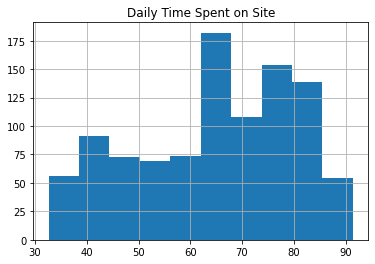

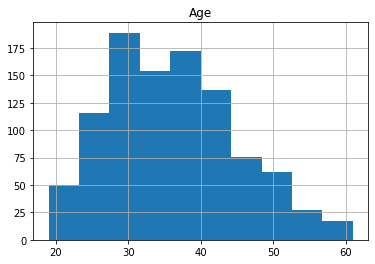

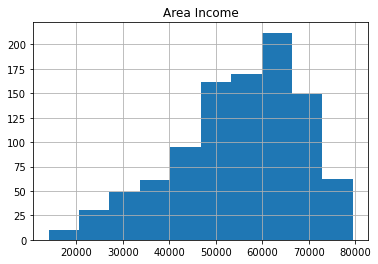

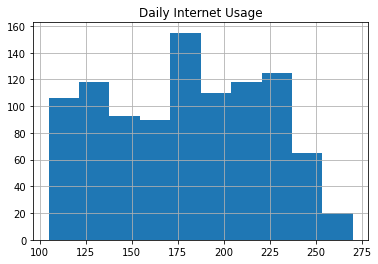

In [14]:
for col in new_data:
    if col != 'Clicked on Ad' and col != 'Unnamed: 0':
        new_data.hist(column = col)






We normalize our dataset. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. When the features are in different ranges, when we do further analysis, the attributed income will intrinsically influence the result more due to its larger value. But this does not necessarily mean it is more important as a predictor.
The formula we use to normalize our dataset is shown below:
item = (item - mean_of_column) / standard_deviation_of_column

In [15]:
for col in new_data:
    if col != 'Clicked on Ad' and col != 'Unnamed: 0':
        new_data[col] = (new_data[col] - new_data[col].mean()) / new_data[col].std()
new_data



,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,0,0.273474,-0.116122,0.509436,1.817578,0.0
1,1,1.015870,-0.576377,1.002029,0.000000,0.0
2,2,0.307698,-1.151696,0.356770,1.351152,0.0
3,3,0.615713,-0.806505,-0.014448,1.574722,0.0
4,4,0.235301,-0.116122,1.408163,1.091154,0.0
...,...,...,...,...,...,...
995,995,0.538051,-0.691441,1.221395,0.686394,1.0
996,996,-0.888164,1.034517,0.952853,-1.079309,1.0
997,997,-0.866445,1.724900,-0.938101,-1.413831,1.0
998,998,-0.608450,-1.957144,-0.974996,0.195207,0.0


The goal of project was to anticipate if a user clicked on advertisement or not. Based on other features and the information we have from other users, we have to decide. We draw probability density function histogram to compare these features.
Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known. In normal distribution, mode equals to mean. 
In *Daily Internet Usage*, two histograms have less conflict with each other and their peaks have more difference. Therefore, we use this feature to fill empty cells in goal column. 

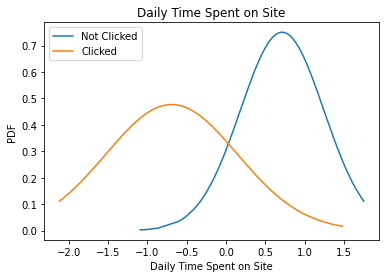

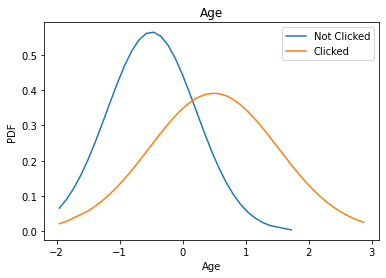

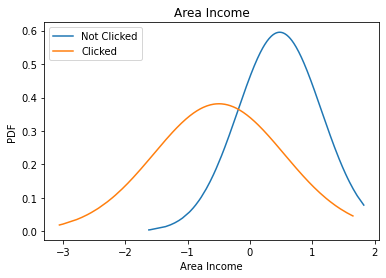

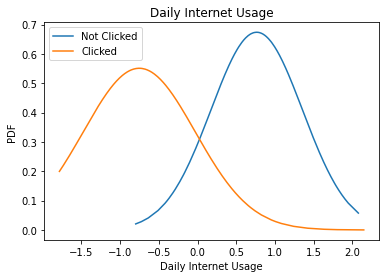

In [16]:
means = new_data.groupby('Clicked on Ad').mean()
dev = new_data.groupby('Clicked on Ad').std()
cond0 = new_data['Clicked on Ad'] == 0
cond1 = new_data['Clicked on Ad'] == 1
for col in new_data:
    if col != 'Clicked on Ad' and col != 'Unnamed: 0':
        y1 = ss.norm.pdf(new_data[col][cond0].sort_values(), means[col][0], dev[col][0]) 
        y2 = ss.norm.pdf(new_data[col][cond1].sort_values(), means[col][1], dev[col][1])
        plt.plot(new_data[col][cond0].sort_values(), y1, label = 'Not Clicked')
        plt.plot(new_data[col][cond1].sort_values(), y2, label='Clicked')
        plt.xlabel(col)
        plt.ylabel('PDF')
        plt.title(col)
        plt.legend()
        plt.show();

About 68% of values drawn from a normal distribution are within one standard deviation away from the mean and about 95% of the values lie within two standard deviations. To predict empty cells we check that *Daily Internet Usage* of the user whose data is missing is closer to mean of users who clicked on advertisement or who did not click.
The variable *count* is defined to make sure that all missing datas are filled. 

In [17]:
sel_mean0 = means['Daily Internet Usage'][0]
sel_mean1 = means['Daily Internet Usage'][1]
sel_dev0 = dev['Daily Internet Usage'][0]
sel_dev1 = dev['Daily Internet Usage'][1]
save_data = {'Index' : [] , 'Clicked on Ad' : []}
count = 0
for index, item in new_data.iterrows():
    if new_data['Clicked on Ad'][index] != 0 and new_data['Clicked on Ad'][index] != 1:
        if new_data['Daily Internet Usage'][index] <= sel_mean0 + sel_dev0 and new_data['Daily Internet Usage'][index] >= sel_mean0 - sel_dev0:
            print(index, ' ', 0)
            save_data['Index'].append(index)
            save_data['Clicked on Ad'].append(0)
    
        if new_data['Daily Internet Usage'][index] <= sel_mean1 + sel_dev1 and new_data['Daily Internet Usage'][index] >= sel_mean1 - sel_dev1:
            print(index, ' ', 1)
            save_data['Index'].append(index)
            save_data['Clicked on Ad'].append(1)
            
        elif new_data['Daily Internet Usage'][index] <= (sel_mean0 + 2 * sel_dev0) and new_data['Daily Internet Usage'][index] >= (sel_mean0 - 2 * sel_dev0):
            print(index, ' ', 0)
            save_data['Index'].append(index)
            save_data['Clicked on Ad'].append(1)
                                              
        elif new_data['Daily Internet Usage'][index] <= sel_mean1 + 2 * sel_dev1 and new_data['Daily Internet Usage'][index] >= sel_mean1 - 2 * sel_dev1:
            print(index, ' ', 1)
            save_data['Index'].append(index)
            save_data['Clicked on Ad'].append(0)
            
        else:
            count += 1
df = pd.DataFrame(save_data, columns = ['Index','Clicked on Ad'])
df.to_csv('result.csv', index = False)

10   1
14   1
15   1
20   0
20   0
24   1
33   0
33   0
40   0
40   0
44   0
44   0
46   0
46   0
70   1
72   1
73   1
81   0
81   0
98   0
117   1
119   1
122   0
122   0
131   1
132   1
143   0
143   0
149   1
150   1
156   1
167   0
167   0
170   1
183   0
196   1
203   0
214   0
214   0
215   1
221   0
221   0
225   1
228   0
228   0
230   0
230   0
245   0
245   0
255   0
255   0
256   0
257   1
266   1
269   0
269   0
275   1
277   0
278   0
288   1
291   0
291   0
294   1
301   1
304   1
307   0
307   0
311   0
312   1
321   0
323   0
324   0
325   0
325   0
337   0
337   0
341   1
357   1
359   0
359   0
366   0
366   0
367   0
373   1
378   1
382   1
383   0
383   0
399   0
399   0
410   0
418   0
421   0
421   0
425   1
426   1
435   1
440   1
441   0
442   1
444   1
457   0
457   0
459   0
459   0
461   1
464   0
464   0
472   0
472   0
482   0
482   0
496   0
496   0
499   1
504   1
507   1
528   1
539   0
539   0
543   1
548   0
552   0
555   0
555   0
561   1
567   0
574 

## conclusion
### In this project we determined missing data of a dataset. By analysing different feature of users, we chose the most reliable feature and based on mean and standard deviation of it, we calculated that *Daily Internet Usage* of user is either closer to users who clicked or who did not. 

## Refrences
#### * https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html
#### *https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
#### *https://stackoverflow.com/questions/44787916/conditional-mean-over-a-pandas-dataframe
#### *https://www.w3resource.com/pandas/dataframe/dataframe-describe.php
#### *https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff
#### *https://en.wikipedia.org/wiki/Normal_distribution